# Analysis Data


In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


1. What are the key variables in your opinion?

In [99]:
invoice.head(2)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96


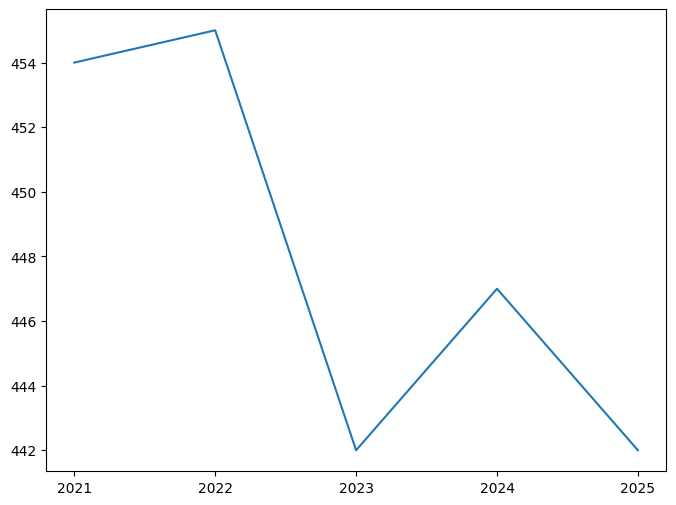

In [103]:
a = pd.merge(invoiceline[['InvoiceId', 'Quantity', 'UnitPrice']],
          invoice[['InvoiceId', 'CustomerId', 'InvoiceDate']], on= 'InvoiceId')
a['year_month']  = a['InvoiceDate'].str[0:4]
b = a.groupby('year_month').sum().reset_index()
plt.figure(figsize=(8,6))
plt.plot(b['year_month'],  b['Quantity'])
plt.show()




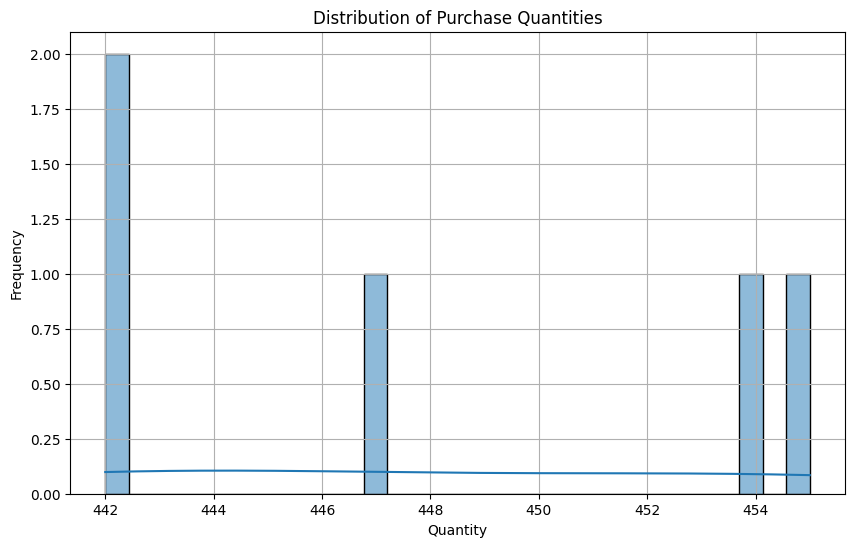

In [105]:
data = b['Quantity']
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=30)
plt.title('Distribution of Purchase Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()